

# Project: Exploratary Data Analysis on TMBD Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

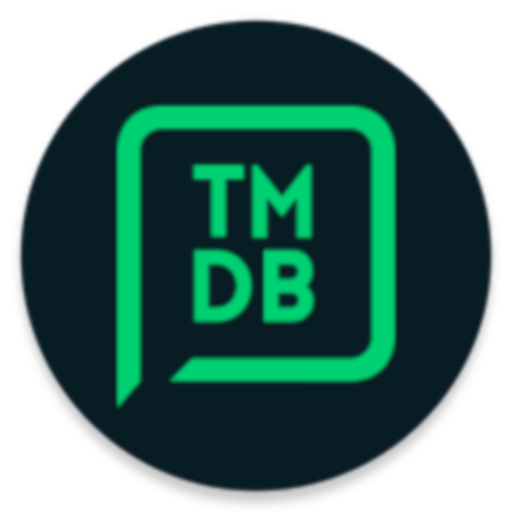

TMDb is an initialism that is almost similar to its more bigger counterpart: IMDb. Both are massive indexes for movie and television information, but The Movie Database differs from the Internet Movie Database in one key aspect that is TMDb is completely powered by its community.

The Movie Database is an online crowdsourced database for movie and television information. The metadata on movies and TV shows is contributed by the 1.1 million strong community. As of writing this, the site has indexed 393,000+ movies and 73,000+ TV shows across 39 languages.

This dataset is a collection of data on around 10000 movies.The primary goal of this is to perform detailed analysis and visualization to derive answers for the questions brainstromed.

We use numpy and pandas for Analysis, matplotib and seaborn for Visualization.

## Outline for Analysis

- Assessed the data and brainstormed questions that could be answered using the data
- Performed necessary cleaning steps to unify formats, deal with missing data and prepare the dataset for analysis
- Wrangled and explored the data using Pandas and Numpy to gather insights about the relationship between different aspects, created visualizations using matplotlib and made inferences to answer research questions

Now lets look at the data to decide what questions can be asked and answered on this data set.







In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [102]:
df_mov=pd.read_csv('tmdb-movies.csv')

In [128]:
df_mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [135]:
df_mov.shape

(10866, 21)

In [137]:
df_mov.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [138]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From above we can determine that the dataset contains 10,866 rows and 21 columns.The data also contains null values and missing values.

## Questions

Based on the the given attributes the following questions can be asked and answered:

- what are  genres available
- what is the most succesfull genre with respect to movies
- which star cast has most movies
- what are the movies with highest and lowest profits
- what are the movies with highest runtime
- Average revenue
- what are the movies with highest and lowest budgets


<a id='wrangling'></a>
## Data Wrangling

In [139]:
df_mov.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15


### Data Cleaning 

Obsevations from the data set:

- No unit of currency is mentioned in the dataset. For this analysis we will consider it as dollar as it is the most used international currency.

- vote_count is different for all the movies, so we cannot directly conclude the popularity of the movies based on the average vote count

Below are the tasks performed to clean the dataset:

- We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
- Removing the duplicate rows (if any).
- Some movies in the database have zero budget or zero revenue, that means the value has not been recorded so we will be discarding such entries
- Changing release date column into date format.
- Replacing zero with NAN in runtime column.
- Changing format of budget and revenue column.

In [140]:
dfm=df_mov.copy()
dfm.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [141]:

## Dropping unused columns

dfm.drop([ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis=1,inplace=True)

In [142]:
## confirming the columns have been deleted
dfm.shape

(10866, 10)

In [143]:
## Removing duplicate rows
dfm.drop_duplicates(keep ='first', inplace=True)

In [144]:

## the result confirms that there was 1 duplicate row which was deleted
dfm.shape

(10865, 10)

In [145]:
## Removing 0's from budget and revenue columns

temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
dfm[temp_list] = dfm[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
dfm.dropna(subset = temp_list, inplace = True)


In [146]:
## After removing the zero values we are left with below number of rows for analysis
dfm.shape

(3854, 10)

In [147]:
## changing the date column format

from datetime import datetime
dfm.release_date=pd.to_datetime(dfm['release_date'])

In [148]:
##confirming the changes
dfm.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [149]:
## Replacing os to nan in runtime 
dfm['runtime']=dfm['runtime'].replace(0,np.NAN)

In [150]:
## type for budget and revenue
dfm.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [151]:


## changing the type for budget and revenue
change_type=['budget', 'revenue']
dfm[change_type]=dfm[change_type].applymap(np.int64)
dfm.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Word cloud
A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms.

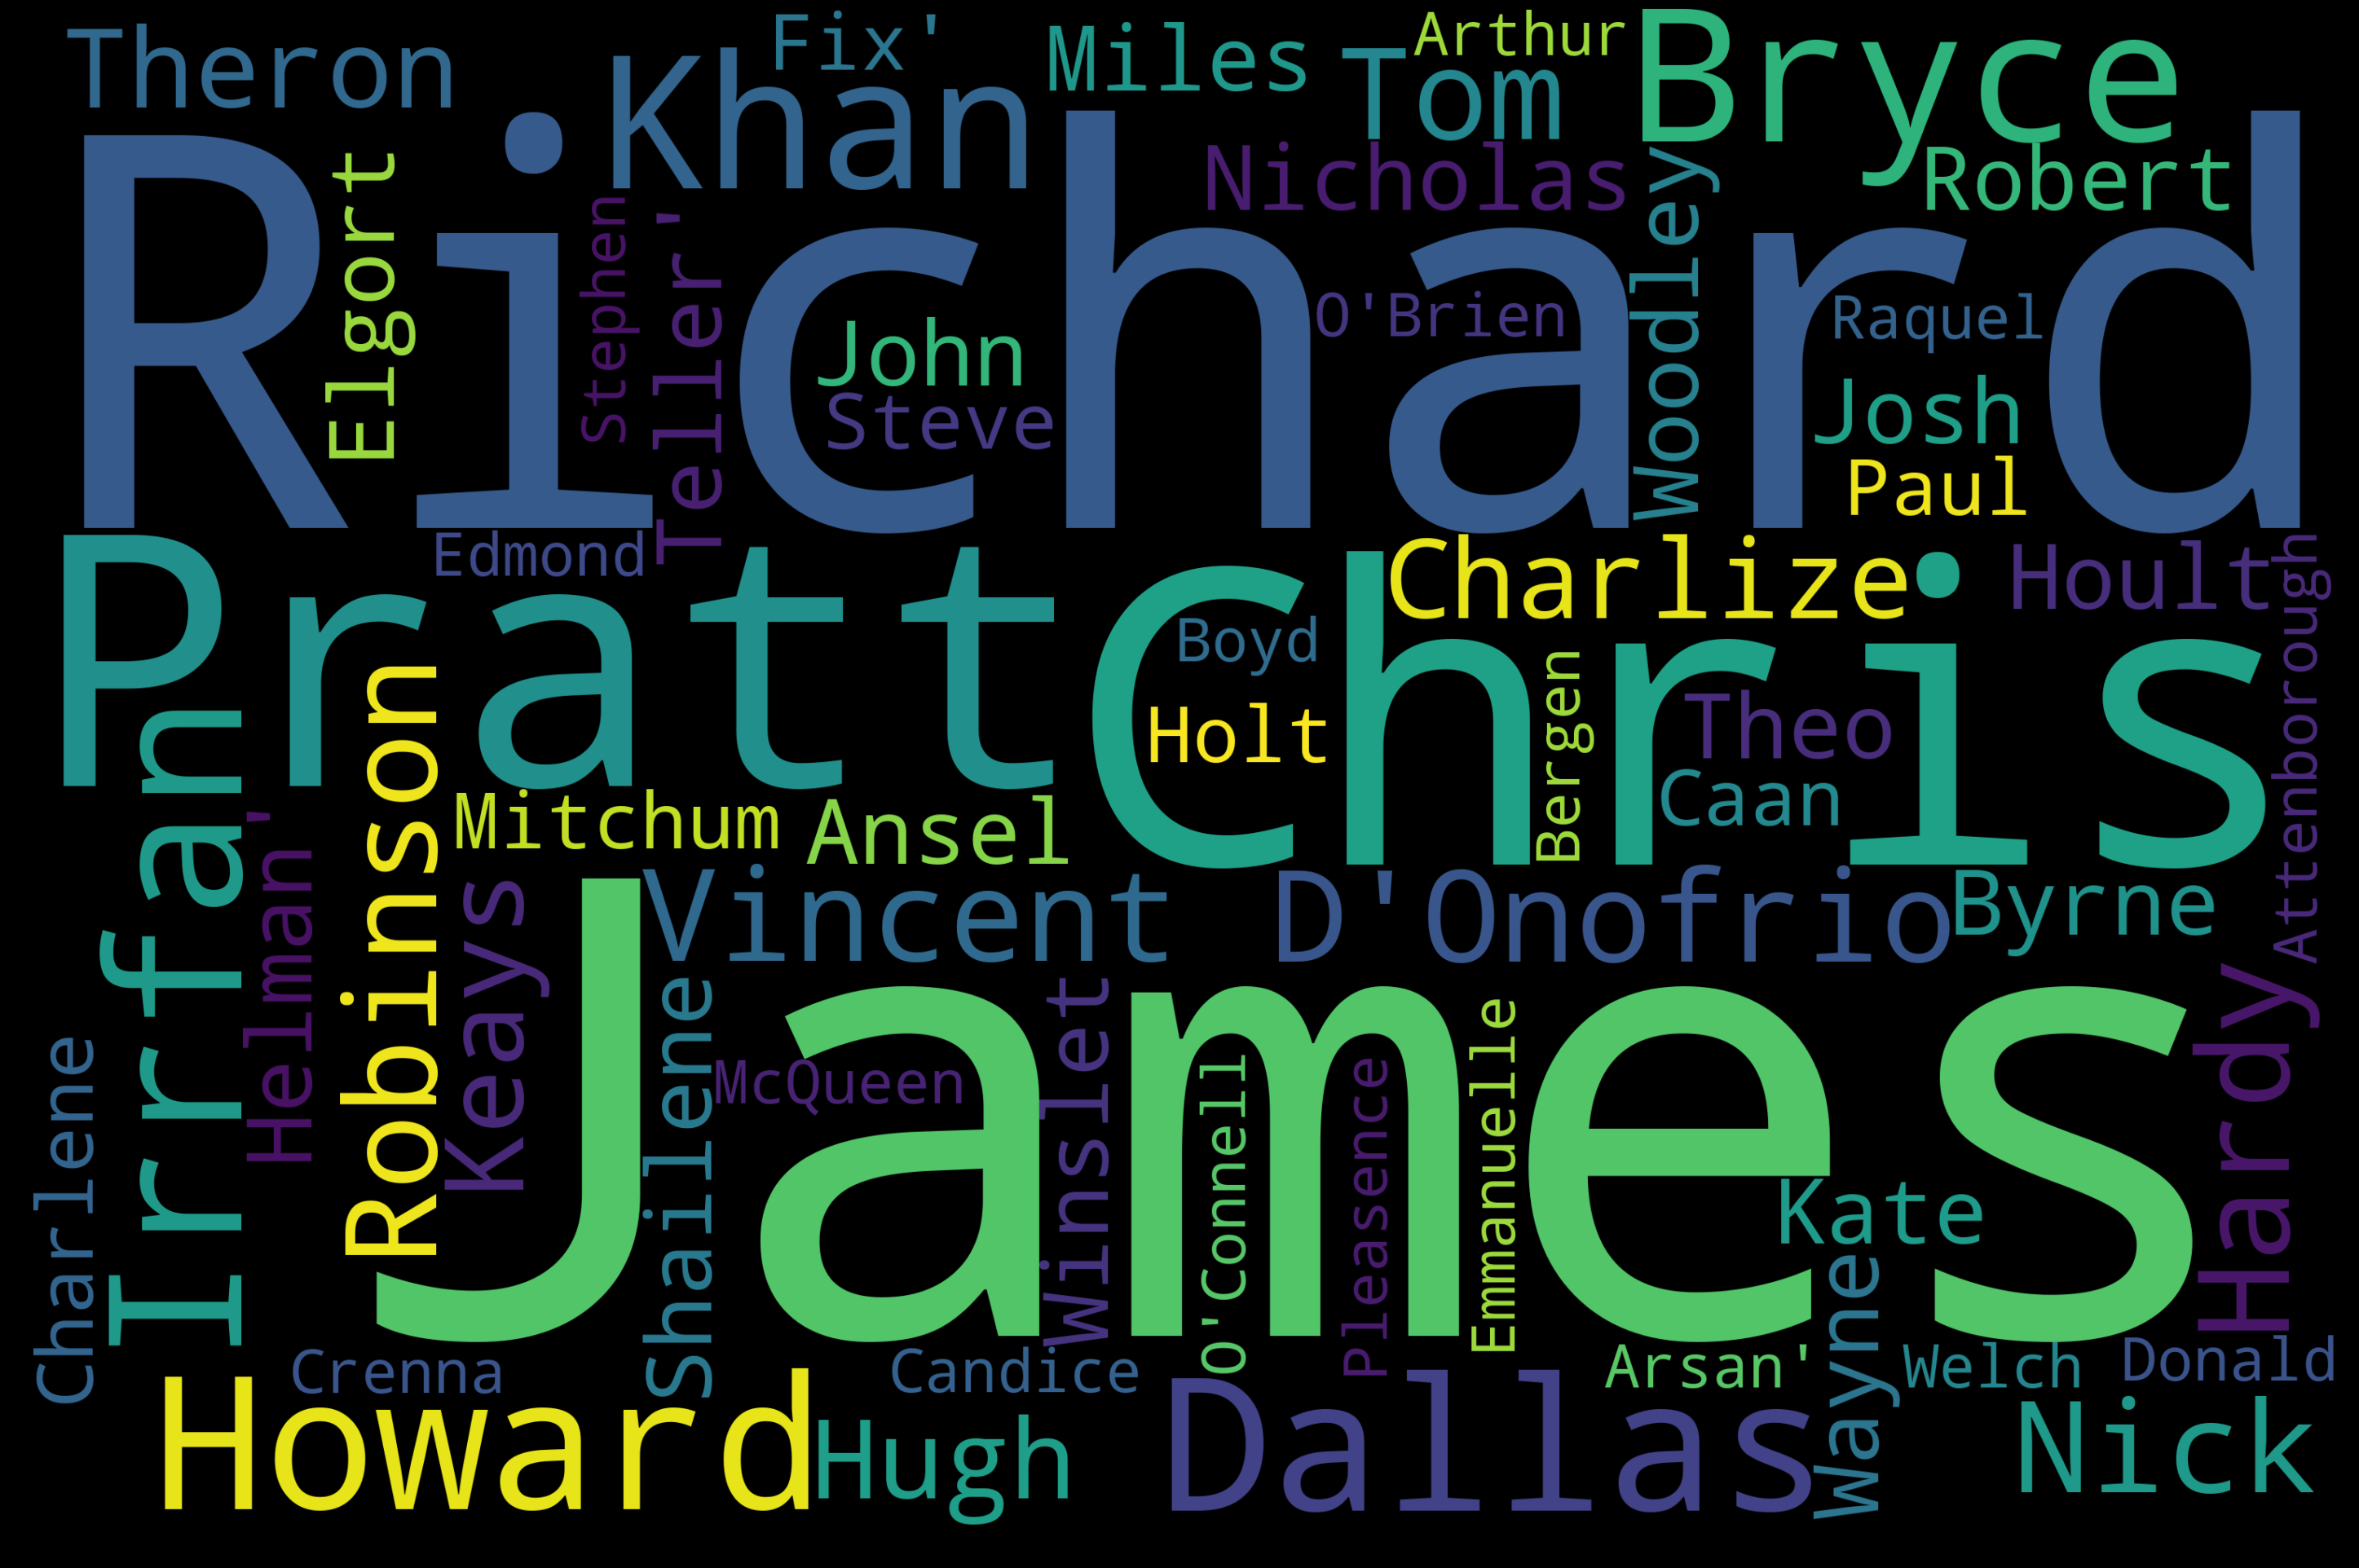

In [152]:
from wordcloud import WordCloud,STOPWORDS
text=dfm.cast.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


The above is the wordcloud for the cast column in the dataset, the same can be done with genres and others as well

### Research Question What are the genres available

,genres,Nbr
0,Drama,245
1,Comedy,233
2,Drama|Romance,107
3,Comedy|Romance,104
4,Comedy|Drama|Romance,91


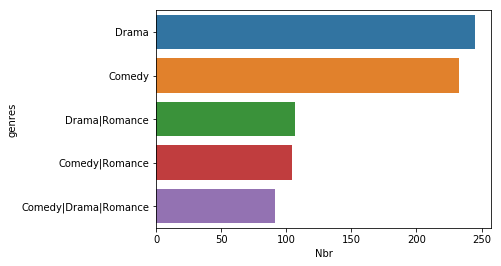

In [153]:
dfm_ge=dfm['genres'].value_counts()
dfm_ge=pd.DataFrame(dfm_ge).reset_index()
dfm_ge.columns = ['genres','Nbr']
sns.barplot(y = 'genres',x = 'Nbr', data=dfm_ge.head())
dfm_ge.head()

if you notice the above graph same genre appears in multiple rows makingit difficult to to determine the accuracy of the data,same situation arrises in cast column as well, becauseof the seperator '|'.lets define a function to split the data on the basis of the seperator.

In [154]:
def data(column):
    
    data = dfm[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

Text(0.5,1,'Top Genres')

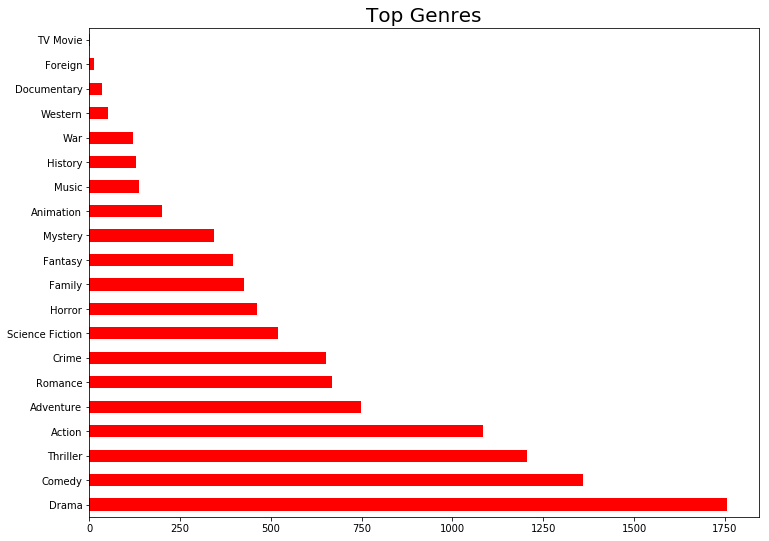

In [155]:
count=data('genres')
count.head()
l=count.plot(kind="barh",color="red")
l.figure.set_size_inches(12, 9)
plt.title("Top Genres",size=20)

From the above visualization we can determine that top 3 genres are DRAMA,COMEDY & THRILLER.

### Research Question 2  What are the successful genres with respect to the profitable movies

We will be considering only the movies which earned a significant ammount of profit,lets create a seperate dataframe just with the list of profitable movie.For ease lets fix this number at 60 million.

In [156]:
## lets calculate the profit earned and insert the column in to the dataframe using insert function

dfm.insert(2,'profit_earned',dfm['revenue']-dfm['budget'])

In [157]:
dfm.head(2)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [158]:
## Now lets create a data frame for profit greater then 60 million
profitdf=dfm[dfm['profit_earned']>=60000000]

#reindexing new data
profitdf.index = range(len(profitdf))

#we will start from 1 instead of 0
profitdf.index = profitdf.index + 1

#printing the changed dataset
profitdf.head()

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [159]:
## now the dataframe consists of the data with profits higher than 60 million
profitdf.shape

(1197, 11)

In [160]:
## i will be using the same function however will pass the profit dataframe to get the genres with respect to profit.

def profit(column):
    
    profit = profitdf[column].str.cat(sep = '|')
    profit= pd.Series(profit.split('|'))
    count = profit.value_counts(ascending = False)
    return count

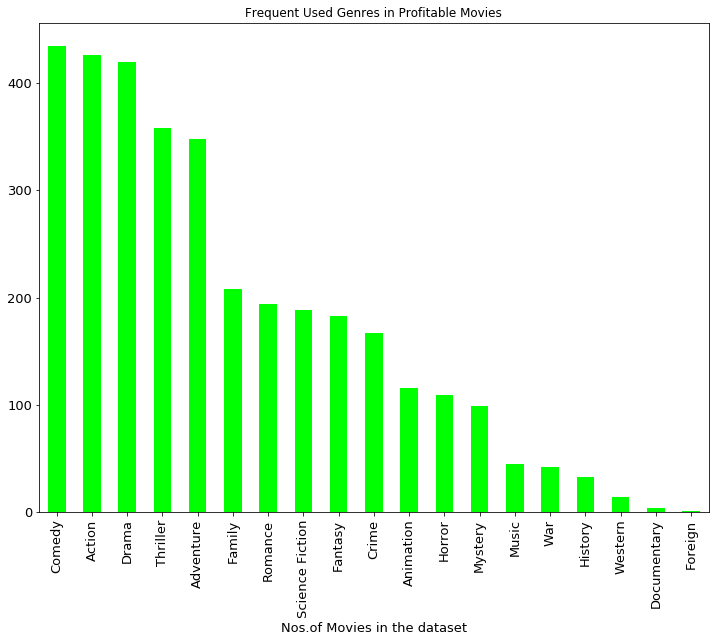

In [161]:
count=profit('genres')
count.head()

#ploting
lt = count.plot.bar(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

From the above we can conclude that the comedy movies are the highly profitable movies


### Research Question 3 Which star cast has most movies


In [162]:
## here we are calling the data(column) function as full dataframe is used in there

count=data('cast')
count.head()


Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

From the above result we know that Robert DE Niro has max movies on tmdb.

### Research Question 4 What are the movies  with highest and lowest  profits


In [163]:
def calculate(column):
    #for highest earned profit
    high= dfm[column].idxmax()
    high_details=pd.DataFrame(dfm.loc[high])
    
    #for lowest earned profit
    low= dfm[column].idxmin()
    low_details=pd.DataFrame(dfm.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


Here we have written a function to create a df  with max and min values and called it on the profit column

### Research Question5  What are the movies  with highest and lowest  budget

here we call the same function on budget column


In [164]:
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


The movie with the highedt budget is The Warriors Way

### Research Question 6 What are the movies  with highest and lowest  runtimes


In [165]:
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


lets dive deeper into this runtime , first lets get some statiscal values by using describe

In [166]:
dfm['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Now lets plot some graphs

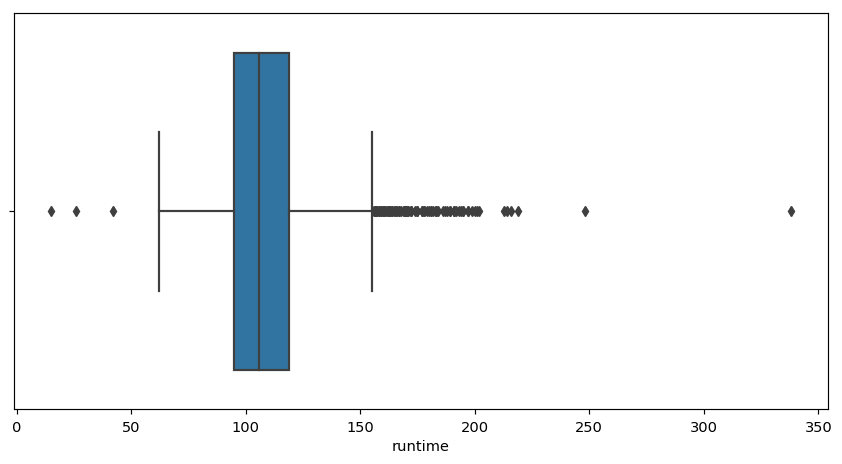

In [167]:
## Box Plot
plt.figure(figsize=(10,5), dpi = 105)
sns.boxplot(dfm['runtime'])
plt.show()

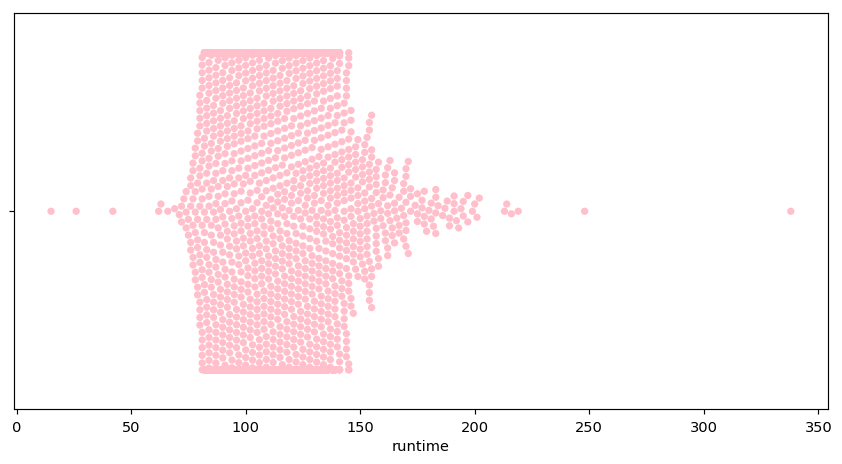

In [169]:
##swarmplot
plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(dfm['runtime'], color = 'pink')
#displaying the plot
plt.show()


### Research Question 7 What is the average revenue

this can be calcuated by calcuating the mean, 

In [170]:
## here we are calculating the avg revenue on the cleaned dataframe

dfm['revenue'].mean()

107686616.09807992

In [171]:
## here we are calculating the avg revenue on the  profit dataframe
profitdf['revenue'].mean()

274739298.8086884

Hence the movies with the profit greater than  60 million has the avg revenue of 275 million.

In [172]:
## averge budget on the profit data
profitdf['budget'].mean()

63757867.395154551

In [173]:
## averge runtime on the profit data
profitdf['runtime'].mean()

114.06850459482038

<a id='conclusions'></a>
## Conclusions

Being a movie buff myself it was great working on this data set .We derived some intresting conclusions after the analysis.

Most commonly successfull movies have below characteristics.

- Average Budget must be around 63 millon dollar
- Average duration of the movie must be 114 minutes
- Genre must be : Comedy, Drama, Action, Thriller

These are some of many characteristics which can make a movie profitable,one key point to be noted is  that all the numerical results for the most part are the outcome of the analysis performed on the profit(.=60 million) based dataframe.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [174]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0